In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Visual inspection

In [48]:
def VisualInspection(ax, f, a, b, dx, **kwargs):
    x = np.arange(a,b+dx,dx)
    y = f(x)
    plt.plot(x, y, **kwargs)
    plt.xlabel('x')
    plt.ylabel('y')

In [49]:
import numpy as np
def integrate_Euler(F,x,y,xStop,h):    
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + h*F(x,y)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)


# Example1


### IVP:
- $\large y' + 4y = x^2$
- $\large y(0) = 1$

### Analytical solution:
- $\large y = \frac{31}{32}e^{-4x} + \frac{1}{4} x^2 - \frac{1}{8}x + \frac{1}{32} $


X's: [0.   0.01 0.02 0.03]
Y's: [1.         0.96       0.921601   0.88474096]

Analytical
True: [1.         0.96078977 0.92311896 0.88692917]


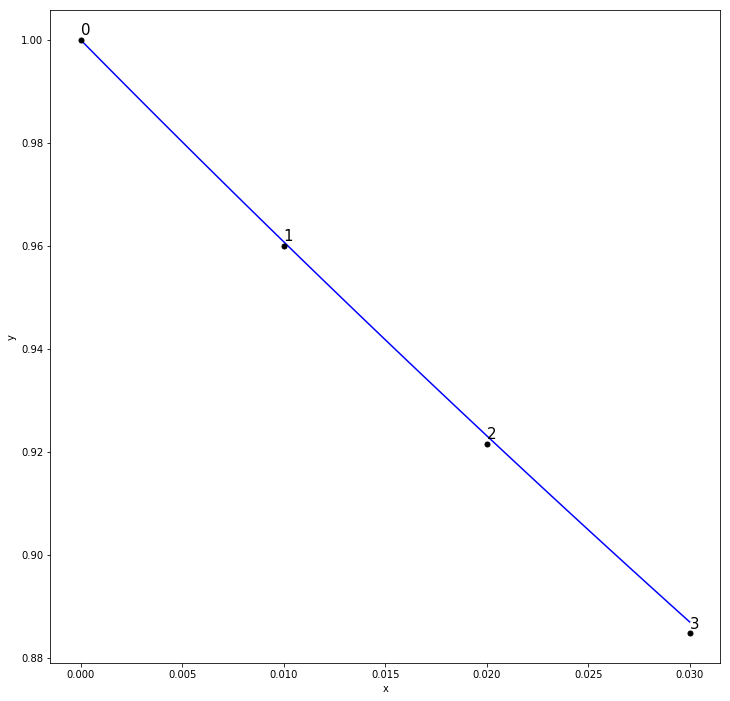

In [50]:
def F(x,y):
    return x**2 - 4*y

def y_ana(x):    
    return (31./32.)*np.exp(-4*x) + (1./4.)*x**2 - (1./8.)*x +(1./32.)

y_true    = y_ana(np.arange(0.0,0.04 ,0.01))

results = integrate_Euler(F, 0, 1, 0.03, 0.01)
print("X's:", results[0])
print("Y's:", results[1])
print("")
print("Analytical")
print("True:", y_true)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, y_ana, 0, 0.03, 0.001, color="blue", linestyle="-")

plt.plot(results[0], results[1], "o", color="black", markersize=5)
for i in range(len(results[0])):
    ax.annotate("%d" % i, xy=(results[0][i], results[1][i]), xytext=(results[0][i], results[1][i]*1.001), fontsize=15 )



# Example2

### IVP:
- $\large y'' = -0.1y' -x$
- $\large y(0) = 0$
- $\large y'(0) = 1$

### Analytical solution:
- $\large y = 100x-5x^2+990(e^{-0.1x}-1) $


X's: [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]
Y's: [[ 0.          1.        ]
 [ 0.05        0.995     ]
 [ 0.09975     0.987525  ]
 [ 0.14912625  0.97758738]
 [ 0.19800562  0.96519944]
 [ 0.24626559  0.95037344]
 [ 0.29378426  0.93312157]
 [ 0.34044034  0.91345597]
 [ 0.38611314  0.89138869]
 [ 0.43068257  0.86693174]
 [ 0.47402916  0.84009708]
 [ 0.51603402  0.8108966 ]
 [ 0.55657885  0.77934212]
 [ 0.59554595  0.7454454 ]
 [ 0.63281822  0.70921818]
 [ 0.66827913  0.67067209]
 [ 0.70181273  0.62981873]
 [ 0.73330367  0.58666963]
 [ 0.76263715  0.54123628]
 [ 0.78969897  0.4935301 ]
 [ 0.81437547  0.44356245]
 [ 0.83655359  0.39134464]
 [ 0.85612083  0.33688792]
 [ 0.87296522  0.28020348]
 [ 0.8869754   0.22130246]
 [ 0.89804052  0.16019595]
 [ 0.90605032  0.09689497]
 [ 0.91089507  0.03141049]
 [ 0.91246559 -0.03624656

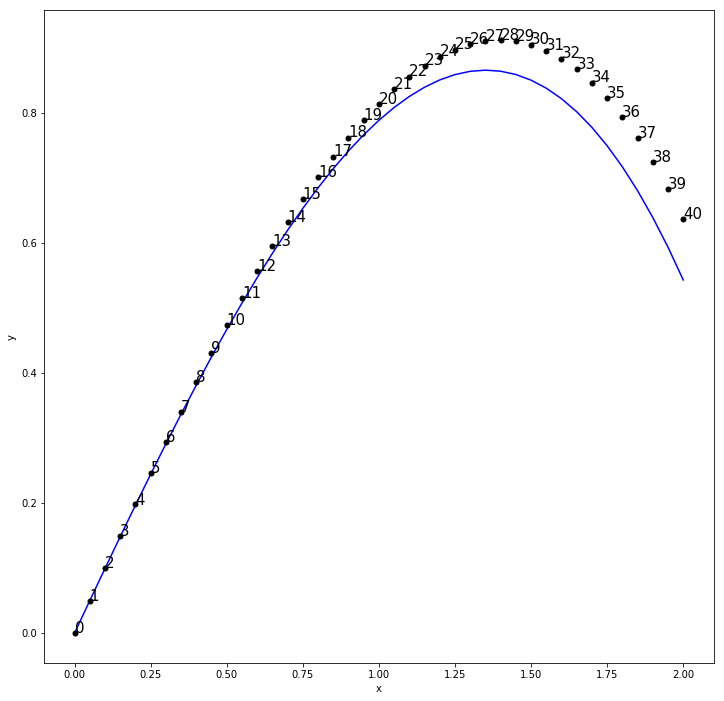

In [52]:
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

def y_ana(x):    
    return 100*x-5*x**2+990*(np.exp(-0.1*x)-1)

h = 0.05
y_true    = y_ana(np.arange(0.0,2.0 ,0.05))
y_start = np.array([0.0,1.0])
results = integrate_Euler(F, 0.0, y_start, 2.0, h)
print("X's:", results[0])
print("Y's:", results[1])
print("")
print("Analytical")
print("True:", y_true)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, y_ana, 0.0, 2.0, 0.05, color="blue", linestyle="-")

plt.plot(results[0], results[1][:,0], "o", color="black", markersize=5)
for i in range(len(results[0])):
    ax.annotate("%d" % i, xy=(results[0][i], results[1][i,0]), xytext=(results[0][i], results[1][i,0]*1.001), fontsize=15 )



# Example3

Using RK4

### IVP:
- $\large y'' = -0.1y' -x$
- $\large y(0) = 0$
- $\large y'(0) = 1$

### Analytical solution:
- $\large y = 100x-5x^2+990(e^{-0.1x}-1) $


In [53]:
import numpy as np
def integrate_RK4(F,x,y,xStop,h):
    
    def run_kut4(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x + h/2.0, y + K0/2.0)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h, y + K2)
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0    
    
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)



Analytical
True: [0.         0.0498544  0.09933541 0.14832021 0.19668657 0.24431291
 0.29107821 0.33686209 0.38154476 0.42500701 0.46713026 0.50779647
 0.54688825 0.58428874 0.61988171 0.65355147 0.68518292 0.71466156
 0.74187342 0.76670512 0.78904386 0.80877736 0.82579394 0.83998247
 0.85123235 0.85943356 0.86447661 0.86625257 0.86465304 0.85957018
 0.85089666 0.83852571 0.82235108 0.80226705 0.77816843 0.74995056
 0.7175093  0.68074101 0.6395426  0.59381148]


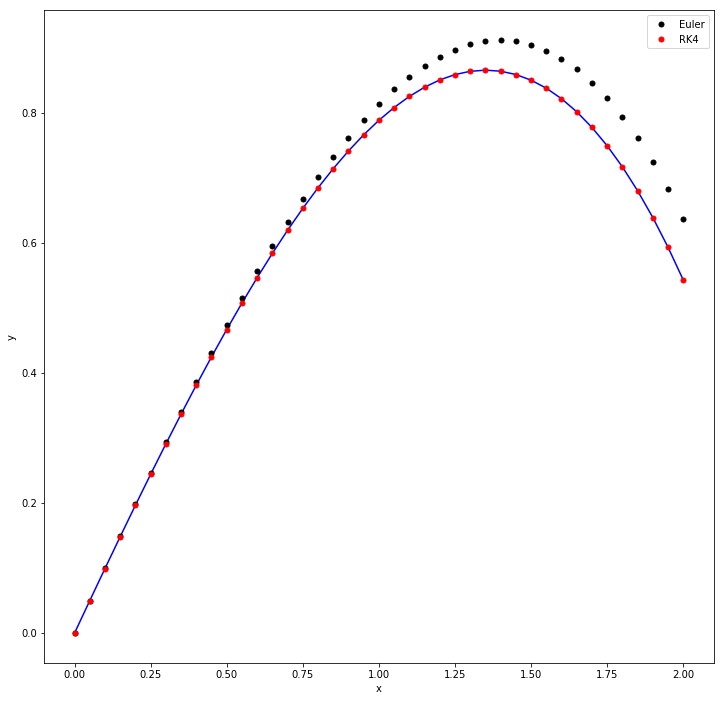

In [54]:
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -0.1*y[1] - x
    return F

def y_ana(x):    
    return 100*x-5*x**2+990*(np.exp(-0.1*x)-1)

h           = 0.05
y_true      = y_ana(np.arange(0.0,2.0 ,0.05))
y_start     = np.array([0.0,1.0])
results_E   = integrate_Euler(F, 0.0, y_start, 2.0, h)
results_RK4 = integrate_RK4  (F, 0.0, y_start, 2.0, h)

print("")
print("Analytical")
print("True:", y_true)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, y_ana, 0.0, 2.0, 0.05, color="blue", linestyle="-")
plt.plot(results_E  [0], results_E  [1][:,0], "o", color="black", markersize=5, label="Euler")
plt.plot(results_RK4[0], results_RK4[1][:,0], "o", color="red"  , markersize=5, label="RK4")

ax.legend()

# Example 4

In [55]:
def F(x,y):
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[0]*(y[3]**2) - 3.9860e14/(y[0]**2)
    F[2] = y[3]
    F[3] = -2.0*y[1]*y[3]/y[0]
    return F

#x = time
x_start = 0.0
x_stop  = 1200.0
y_start = np.array([7.15014e6, 0.0, 0.0, 0.937045e-3])
h       = 50.0
freq    = 2

results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)

In [56]:
results_RK4

(array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000., 1050., 1100., 1150., 1200.]),
 array([[ 7.15014000e+06,  0.00000000e+00,  0.00000000e+00,
          9.37045000e-04],
        [ 7.14824212e+06, -7.59080934e+01,  4.68605432e-02,
          9.37542643e-04],
        [ 7.14255063e+06, -1.51729866e+02,  9.37708809e-02,
          9.39037387e-04],
        [ 7.13307203e+06, -2.27377882e+02,  1.40780989e-01,
          9.41534677e-04],
        [ 7.11981723e+06, -3.02762465e+02,  1.87941208e-01,
          9.45043606e-04],
        [ 7.10280172e+06, -3.77790542e+02,  2.35302422e-01,
          9.49576933e-04],
        [ 7.08204574e+06, -4.52364449e+02,  2.82916247e-01,
          9.55151107e-04],
        [ 7.05757456e+06, -5.26380688e+02,  3.30835215e-01,
          9.61786303e-04],
        [ 7.02941880e+06, -5.99728608e+02,  3.79112959e-01,
          9.69506445e-04],
        [ 6.9976

[7150140.         7148242.11819888 7142550.62856771 7133072.02605235
 7119817.22866515 7102801.71829295 7082045.7401441  7057574.56315836
 7029418.8043778  6997614.82095199 6962205.17412357 6923239.17019836
 6880773.48413344 6834872.87195147 6785610.97867559 6733071.24882853
 6677347.94668468 6618547.29331644 6556788.72691847 6492206.29177147
 6424950.15932657 6355188.28200342 6283108.17609726 6208918.82431285
 6132852.68045759]
[0.         0.04686054 0.09377088 0.14078099 0.18794121 0.23530242
 0.28291625 0.33083521 0.37911296 0.4278044  0.47696595 0.52665568
 0.57693351 0.62786144 0.67950365 0.73192676 0.78519993 0.83939503
 0.89458675 0.95085268 1.00827338 1.06693229 1.12691572 1.18831254
 1.25121398]


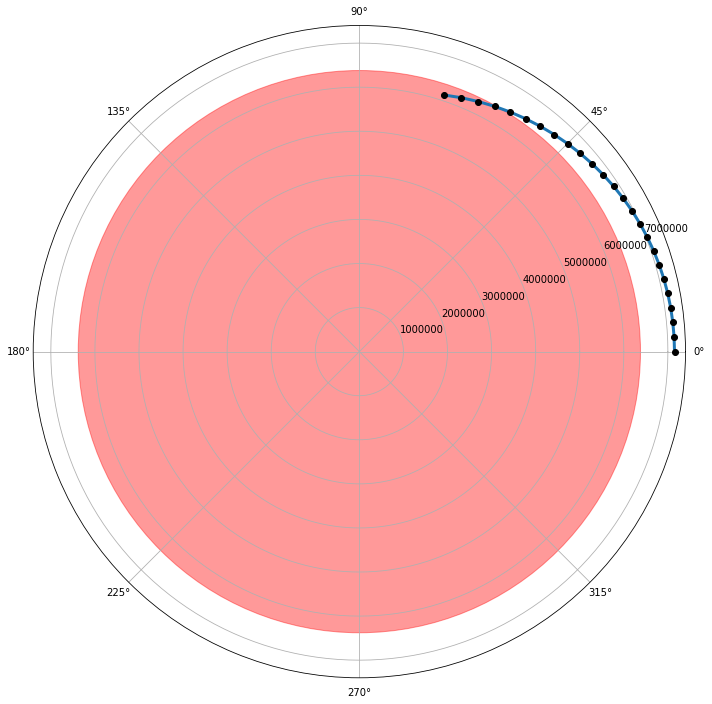

In [57]:

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
x_steps = results_RK4[0]
y_steps = results_RK4[1]
rs     = y_steps[:,0]
print(rs)
thetas = y_steps[:,2]
print(thetas)
ax.plot(thetas, rs, lw=3)
ax.plot(thetas, rs, "ko")
ax.set_rmin(0)#6.0E6)
ax.set_rmax(7.4E6)

circle = plt.Circle((0.0, 0.0),  6.37814e6, transform=ax.transData._b, color="red", alpha=0.4)
ax.add_artist(circle)


plt.show()


# Example 5 (problème a deux corps)
 
$\Large \frac{G m_0 m_1}{d^2} = m_0 a_0 \rightarrow a_0 = v_0' = \frac{G m_1}{d^2}$
 

In [58]:
def showResults(results_RK4, m_0=None, m_1=None, m_2=None, animate=True):
    from IPython.display import display, clear_output

    fig, ax = plt.subplots(figsize=(12, 12))
    t_steps = results_RK4[0]
    y_steps = results_RK4[1]

    #animation
    if(animate):
        for i in range(y_steps.shape[0]):
            ax.cla() #clear axes
            ax.set_xlim(y_steps[:,[0,2,4]].min()*1.1, y_steps[:,[0,2,4]].max()*1.1)
            ax.set_ylim(y_steps[:,[1,3,5]].min()*1.1, y_steps[:,[1,3,5]].max()*1.1)
            
            if(i>0):
                if(m_0):ax.arrow(y_steps[i-1,0], y_steps[i-1,1], y_steps[i,0]-y_steps[i-1,0], y_steps[i,1]-y_steps[i-1,1], width=0.1, color="b")
                if(m_1):ax.arrow(y_steps[i-1,2], y_steps[i-1,3], y_steps[i,2]-y_steps[i-1,2], y_steps[i,3]-y_steps[i-1,3], width=0.1, color="r")                
                if(m_2):ax.arrow(y_steps[i-1,4], y_steps[i-1,5], y_steps[i,4]-y_steps[i-1,4], y_steps[i,5]-y_steps[i-1,5], width=0.1, color="r")                

            if(m_0):ax.plot(y_steps[i,0], y_steps[i,1], "-ob", markersize=np.max([5.0, 10*m_0]))
            if(m_1):ax.plot(y_steps[i,2], y_steps[i,3], "-or", markersize=np.max([5.0, 10*m_1]))
            if(m_2):ax.plot(y_steps[i,4], y_steps[i,5], "-og", markersize=np.max([5.0, 10*m_2]))
                                
            display(fig)    
            clear_output(wait = True)

    #summary
    if(m_0):ax.plot(y_steps[:,0], y_steps[:,1], "-ob",  markersize=10*m_0)
    if(m_1):ax.plot(y_steps[:,2], y_steps[:,3], "-or",  markersize=10*m_1)
    if(m_2):ax.plot(y_steps[:,4], y_steps[:,5], "-og",  markersize=10*m_2)        
    for i in range(y_steps.shape[0]):
        if(m_0):ax.annotate("%d" % i, xy=(y_steps[i,0], y_steps[i,1]), xytext=(y_steps[i,0], y_steps[i,1]), fontsize=15 )
        if(m_1):ax.annotate("%d" % i, xy=(y_steps[i,2], y_steps[i,3]), xytext=(y_steps[i,2], y_steps[i,3]), fontsize=15 )    
        if(m_2):ax.annotate("%d" % i, xy=(y_steps[i,4], y_steps[i,5]), xytext=(y_steps[i,4], y_steps[i,5]), fontsize=15 )            


    plt.show()    

## système planétaire (circulaire)

In [ ]:
#y = (x_0, y_0, x_1, y_1, dx_0, dy_0, dx_1, dy_1)

G   = 1
m_0 = 10.0
m_1 = 0.01

def F(t,y):
    x_0, y_0, x_1, y_1 = y[0:4]
    dist = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    
    F = np.zeros(8)
    F[0:4] = y[4:8]
    F[4]   = -G*m_1*(x_0-x_1)/dist**2
    F[5]   = -G*m_1*(y_0-y_1)/dist**2
    F[6]   = -G*m_0*(x_1-x_0)/dist**2
    F[7]   = -G*m_0*(y_1-y_0)/dist**2
    return F

#x = time
x_start = 0.0
x_stop  = 800.0
y_start = np.array([   0.0,  0.0, #0 x-y position
                     100.0,  0.0, #1 x-y position
                       0.0,  0.0, #0 x-y speed
                       0.0, -3.0  #1 x-y speed
                   ])
h       = 10.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, animate=True)

## système planétaire (elliptique)

In [ ]:
G   = 1
m_0 = 10.0
m_1 = 0.01

def F(t,y):
    x_0, y_0, x_1, y_1 = y[0:4]
    dist = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    
    F = np.zeros(8)
    F[0:4] = y[4:8]
    F[4]   = -G*m_1*(x_0-x_1)/dist**2
    F[5]   = -G*m_1*(y_0-y_1)/dist**2
    F[6]   = -G*m_0*(x_1-x_0)/dist**2
    F[7]   = -G*m_0*(y_1-y_0)/dist**2
    return F

#x = time
x_start = 0.0
x_stop  = 1000.0
y_start = np.array([   0.0,  0.0, #0 x-y position
                     100.0,  0.0, #1 x-y position
                       0.0,  0.0, #0 x-y speed
                       0.0, -5.0  #1 x-y speed
                   ])
h       = 20.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, animate=True)

## deux corps (même masse en orbite)

In [ ]:
#y = (x_0, y_0, x_1, y_1, dx_0, dy_0, dx_1, dy_1)

G   = 1
m_0 = 1.0
m_1 = 1.0

def F(t,y):
    x_0, y_0, x_1, y_1 = y[0:4]
    dist = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    
    F = np.zeros(8)
    F[0:4] = y[4:8]
    F[4]   = -G*m_1*(x_0-x_1)/dist**2
    F[5]   = -G*m_1*(y_0-y_1)/dist**2
    F[6]   = -G*m_0*(x_1-x_0)/dist**2
    F[7]   = -G*m_0*(y_1-y_0)/dist**2
    return F

#x = time
x_start = 0.0
x_stop  = 2000.0
y_start = np.array([-100.0,  0.0, #0 x-y position
                     100.0,  0.0, #1 x-y position
                       0.0, 0.70, #0 x-y speed
                       0.0,-0.70  #1 x-y speed
                   ])
h       = 20.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, animate=True)

## deux corps (même masse chaotique)

In [ ]:
#y = (x_0, y_0, x_1, y_1, dx_0, dy_0, dx_1, dy_1)

G   = 1
m_0 = 1.0
m_1 = 1.0

def F(t,y):
    x_0, y_0, x_1, y_1 = y[0:4]
    dist = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    
    F = np.zeros(8)
    F[0:4] = y[4:8]
    F[4]   = -G*m_1*(x_0-x_1)/dist**2
    F[5]   = -G*m_1*(y_0-y_1)/dist**2
    F[6]   = -G*m_0*(x_1-x_0)/dist**2
    F[7]   = -G*m_0*(y_1-y_0)/dist**2
    return F

#x = time
x_start = 0.0
x_stop  = 2000.0
y_start = np.array([-100.0,  0.0, #0 x-y position
                     100.0,  0.0, #1 x-y position
                       0.0, 0.70, #0 x-y speed
                       0.0,-0.20  #1 x-y speed
                   ])
h       = 20.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, animate=True)

## trois corps (en orbite circulaire)

In [ ]:
G   = 1
m_0 = 10.0
m_1 = 0.01
m_2 = 0.01

def F(t,y):
    x_0, y_0, x_1, y_1, x_2, y_2 = y[0:6]
    dist_01 = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    dist_02 = np.sqrt((x_0-x_2)**2 + (y_0-y_2)**2 )
    dist_12 = np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2 )
    
    F = np.zeros(12)
    F[0:6] = y[6:12]
    F[6]   = -G*m_1*(x_0-x_1)/dist_01**2 + -G*m_2*(x_0-x_2)/dist_02**2
    F[7]   = -G*m_1*(y_0-y_1)/dist_01**2 + -G*m_2*(y_0-y_2)/dist_02**2
    F[8]   = -G*m_0*(x_1-x_0)/dist_01**2 + -G*m_2*(x_1-x_2)/dist_02**2
    F[9]   = -G*m_0*(y_1-y_0)/dist_01**2 + -G*m_2*(y_1-y_2)/dist_02**2
    F[10]  = -G*m_0*(x_2-x_0)/dist_02**2 + -G*m_1*(x_2-x_1)/dist_12**2
    F[11]  = -G*m_0*(y_2-y_0)/dist_02**2 + -G*m_1*(y_2-y_1)/dist_12**2    
    return F

#x = time
x_start = 0.0
x_stop  = 800.0
y_start = np.array([   0.0,  0.0, #0 x-y position
                     100.0,  0.0, #1 x-y position
                     300.0,  0.0, #2 x-y position
                       0.0,  0.0, #0 x-y speed
                       0.0, -3.0, #1 x-y speed
                       0.0, +3.0  #2 x-y speed
                   ])
h       = 10.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, m_2, animate=True)

In [ ]:
G   = 1
m_0 =  5.0
m_1 =  5.0
m_2 =  0.05

def F(t,y):
    x_0, y_0, x_1, y_1, x_2, y_2 = y[0:6]
    dist_01 = np.sqrt((x_0-x_1)**2 + (y_0-y_1)**2 )
    dist_02 = np.sqrt((x_0-x_2)**2 + (y_0-y_2)**2 )
    dist_12 = np.sqrt((x_1-x_2)**2 + (y_1-y_2)**2 )
    
    F = np.zeros(12)
    F[0:6] = y[6:12]
    F[6]   = -G*m_1*(x_0-x_1)/dist_01**2 + -G*m_2*(x_0-x_2)/dist_02**2
    F[7]   = -G*m_1*(y_0-y_1)/dist_01**2 + -G*m_2*(y_0-y_2)/dist_02**2
    F[8]   = -G*m_0*(x_1-x_0)/dist_01**2 + -G*m_2*(x_1-x_2)/dist_02**2
    F[9]   = -G*m_0*(y_1-y_0)/dist_01**2 + -G*m_2*(y_1-y_2)/dist_02**2
    F[10]  = -G*m_0*(x_2-x_0)/dist_02**2 + -G*m_1*(x_2-x_1)/dist_12**2
    F[11]  = -G*m_0*(y_2-y_0)/dist_02**2 + -G*m_1*(y_2-y_1)/dist_12**2    
    return F

#x = time
x_start = 0.0
x_stop  = 3000.0
y_start = np.array([100.0*np.cos(0.0/2.0 * 2*np.pi), 100.0*np.sin(0.0/2.0 * 2*np.pi), #0 x-y position
                    100.0*np.cos(1.0/2.0 * 2*np.pi), 100.0*np.sin(1.0/2.0 * 2*np.pi), #1 x-y position
                   1000.0*np.cos(5.0/6.0 * 2*np.pi),1000.0*np.sin(5.0/6.0 * 2*np.pi), #2 x-y position
                     -2.0*np.sin(0.0/2.0 * 2*np.pi),   2.0*np.cos(0.0/2.0 * 2*np.pi), #0 x-y position
                     -2.0*np.sin(1.0/2.0 * 2*np.pi),   2.0*np.cos(1.0/2.0 * 2*np.pi), #1 x-y position
                     -2.5*np.sin(5.0/6.0 * 2*np.pi),   2.5*np.cos(5.0/6.0 * 2*np.pi), #2 x-y position
                   ])
h       = 40.0
results_RK4 = integrate_RK4  (F, x_start, y_start, x_stop, h)
showResults(results_RK4, m_0, m_1, m_2, animate=True)

# Example 5

Periodic function:
-    $\large y'' = - C y$

In [ ]:
period = 3.5
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -1*(period**2)*y[0]
    return F

def y_ana(x):
    return np.sin(period*x)

h           = 0.05
x_start     = 0.0
x_end       = 5.0 
y_true      = y_ana(np.arange(x_start,x_end ,h))
y_start     = np.array([0.0,period*1.0])
results_E   = integrate_Euler(F, x_start, y_start, x_end, h)
results_RK4 = integrate_RK4  (F, x_start, y_start, x_end, h)

print("")
print("Analytical")
print("True:", y_true)

fig, ax = plt.subplots(figsize=(12, 12))
VisualInspection(ax, y_ana, x_start, x_end, h, color="blue", linestyle="-", linewidth=3, label="analytic")
plt.plot(results_E  [0], results_E  [1][:,0], "o", color="black", markersize=5, label="Euler")
plt.plot(results_RK4[0], results_RK4[1][:,0], "o", color="red"  , markersize=5, label="RK4")

ax.legend()